# PREPARATION SET UP

## Import Library

In [ ]:
# for data wragling
from google.colab import files
import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
# ML Models
from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier


from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import f1_score, precision_score, recall_score, fbeta_score
from sklearn.metrics import accuracy_score
# Model Evaluation
# Hyperparameter

## Import Data

In [ ]:
uploaded = files.upload()

Saving Data Test.csv to Data Test (2).csv
Saving Data Train.csv to Data Train (2).csv


In [ ]:
data_train = pd.read_csv(io.BytesIO(uploaded['Data Train.csv']))

In [ ]:
data_test = pd.read_csv(io.BytesIO(uploaded['Data Test.csv']))

# EDA INVESTIGATION

## Structure

### Dataset Characteristics

Dataset Challeges menggunakan Dataset Telecom Churn, yang terdiri dari data (fitur) aktivitas pelanggan yang dibersihkan, bersama dengan label churn yang menentukan apakah pelanggan membatalkan langganan, akan digunakan untuk mengembangkan model prediktif. Dua set data tersedia di sini: Dataset train dan test.

Kedua set berasal dari batch yang sama, tetapi telah dibagi dengan rasio 90/10. Karena lebih banyak data sering diinginkan untuk mengembangkan model ML, mari gunakan kumpulan yang lebih besar (yaitu, train =90) untuk tujuan pelatihan dan validasi silang, dan kumpulan yang lebih kecil (yaitu, test =10) untuk pengujian akhir dan performa model evaluasi.

Oleh karena itu tujuan dari challenges ini, melakukan prediksi customer churn. Prediksi ini penting diketahui oleh perusahaan agar bisa memetakan strategi bisnis untuk mempertahankan
pelanggan.



### Dataset Attributes

In [ ]:
data_train.shape

(4250, 20)

Jadi kita tahu bahwa dataset ini memiliki 4250 sampel dan 20 fitur. Dan berapa banyak tipe data berbeda yang terkandung dalam 20 fitur ini?

In [ ]:
#menghitung berapaka kali setiap tipe muncul pada dataset
pd.value_counts(data_train.dtypes)

float64    8
int64      7
object     5
dtype: int64

##### Non-numerical Features

In [ ]:
data_train.select_dtypes(exclude="number").head()

,state,area_code,international_plan,voice_mail_plan,churn
0,OH,area_code_415,no,yes,no
1,NJ,area_code_415,no,no,no
2,OH,area_code_408,yes,no,no
3,OK,area_code_415,yes,no,no
4,MA,area_code_510,no,yes,no


In [ ]:
data_train.describe(exclude="number")

,state,area_code,international_plan,voice_mail_plan,churn
count,4250,4250,4250,4250,4250
unique,51,3,2,2,2
top,WV,area_code_415,no,no,no
freq,139,2108,3854,3138,3652


##### Numerical Features

Proses ini melihat berapa banyak nilai unik yang dimiliki masing-masing fitur numeriknya. Proses akan memberikan beberapa wawasan tentang jumlah fitur biner (2 nilai unik), ordinal (3 hingga ~10 nilai unik) dan kontinu (lebih dari 10 nilai unik) dalam kumpulan data.

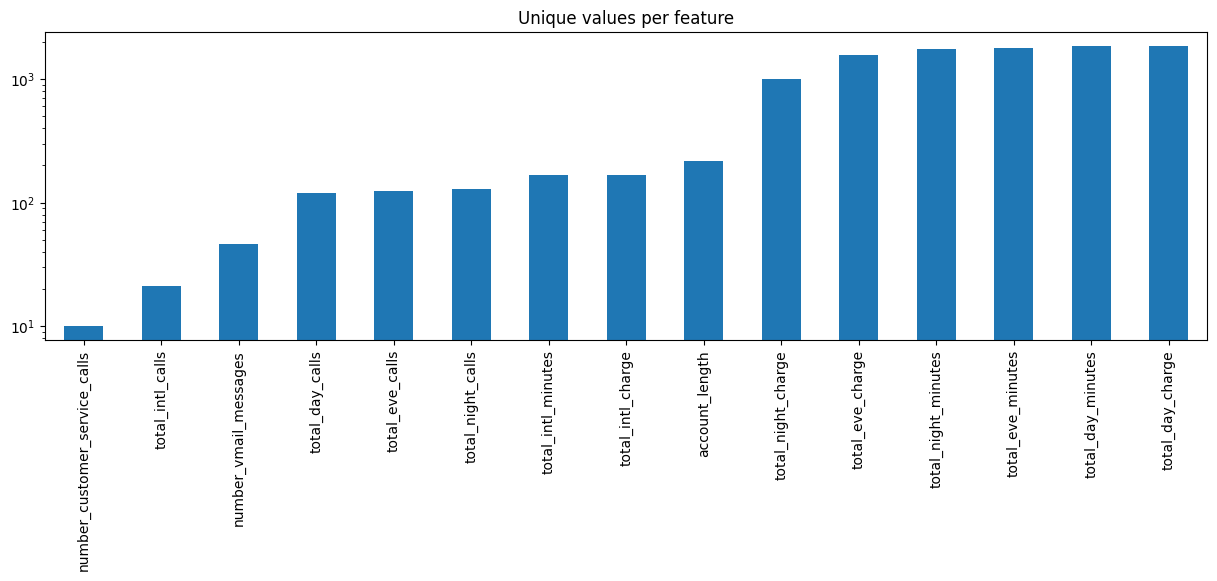

In [ ]:
# For each numerical feature compute number of unique entries
unique_values = data_train.select_dtypes(include="number").nunique().sort_values()

# Plot information with y-axis in log-scale
unique_values.plot.bar( logy=True, figsize=(15, 4), title="Unique values per feature");

### Conclusion of structure investigation

Setiap baris mewakili pelanggan; setiap kolom berisi atribut pelanggan. Dataset "train" berisi 4250 baris (pelanggan) dan 20 kolom (fitur). **Terdapat 15 fitur numerik dan 5 fitur non numerik**. Kolom "Churn" adalah target untuk diprediksi.




Dataset memiliki atribut atau fitur berikut:
1. State: string
2. Account length: integer
3. Area code: integer
4. International plan: string
5. Voice mail plan: string
6. Number vmail messages: integer
7. Total day minutes: double
8. Total day calls: integer
9. Total day charge: double
10. Total eve minutes: double
11. Total eve calls: integer
12. Total eve charge: double
13. Total night minutes: double
14. Total night calls: integer
15. Total night charge: double
16. Total intl minutes: double
17. Total intl calls: integer
18. Total intl charge: double
19. Customer service calls: integer
20. Churn: string

## Quality

### Check Duplicate

In [ ]:
# Check number of duplicates while ignoring the index feature
n_duplicates = data_train.drop(labels=["state"], axis=1).duplicated().sum()
print(f"Sepertinya Anda memiliki {n_duplicates} duplikat pada dataset.")

Sepertinya Anda memiliki 0 duplikat pada dataset.


dari hasil tersebut, maka tidak dibutuhkan handle duplicate pada tahap preprocessing

### Missing Value

##### Per-sample

In [ ]:
data_train.isna().sum()

state                            0
account_length                   0
area_code                        0
international_plan               0
voice_mail_plan                  0
number_vmail_messages            0
total_day_minutes                0
total_day_calls                  0
total_day_charge                 0
total_eve_minutes                0
total_eve_calls                  0
total_eve_charge                 0
total_night_minutes              0
total_night_calls                0
total_night_charge               0
total_intl_minutes               0
total_intl_calls                 0
total_intl_charge                0
number_customer_service_calls    0
churn                            0
dtype: int64

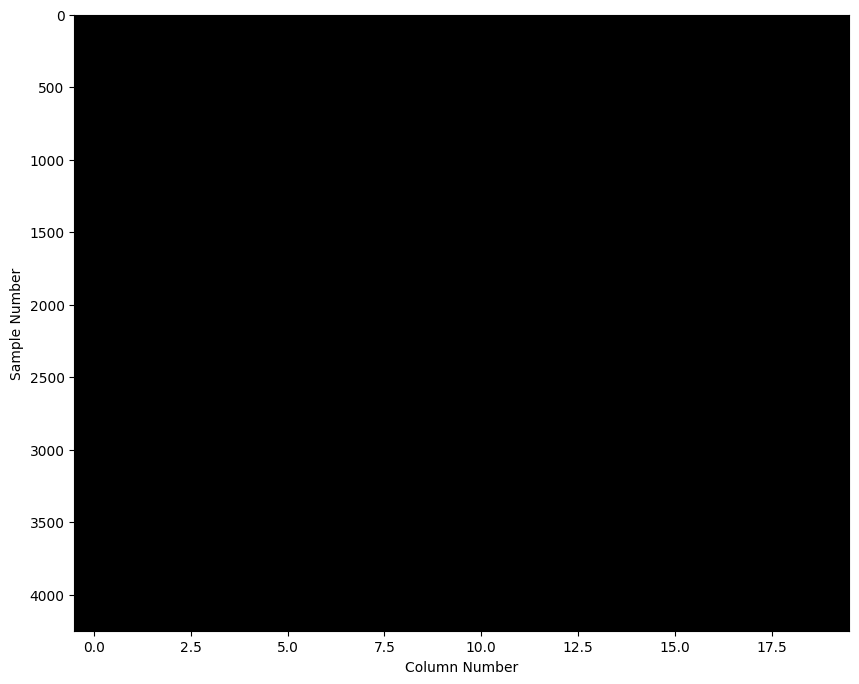

In [ ]:
plt.figure(figsize=(10, 8))
plt.imshow(data_train.isna(), aspect="auto", interpolation="nearest", cmap="gray")
plt.xlabel("Column Number")
plt.ylabel("Sample Number");

##### Per-features

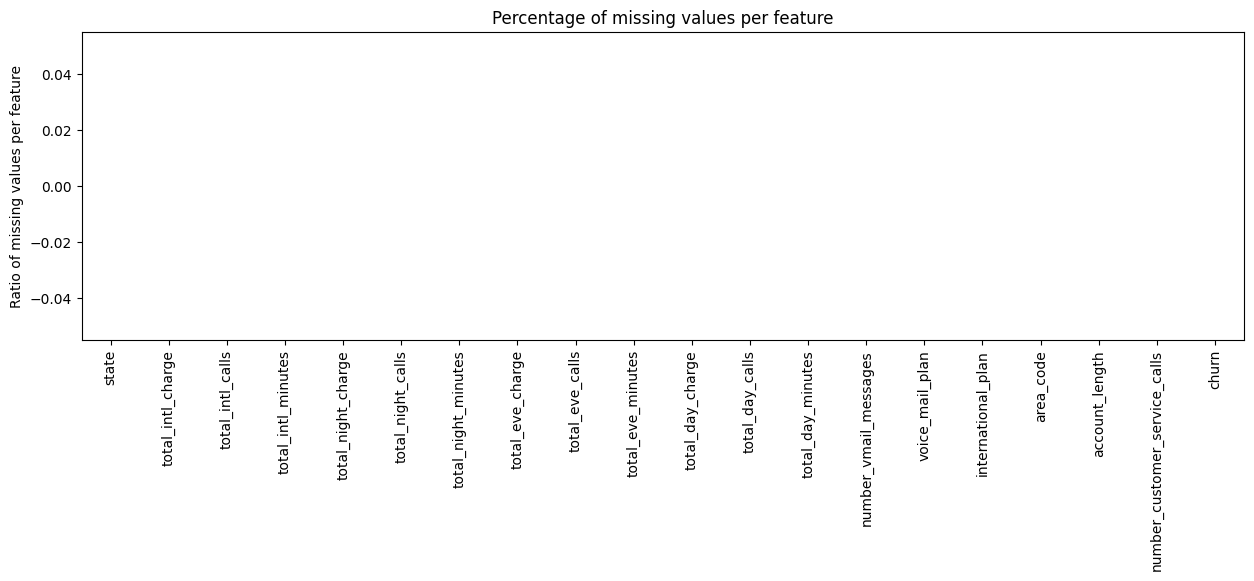

In [ ]:
data_train.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 4),
    title="Percentage of missing values per feature",
    ylabel="Ratio of missing values per feature");

### Unwanted Entries (outliers)

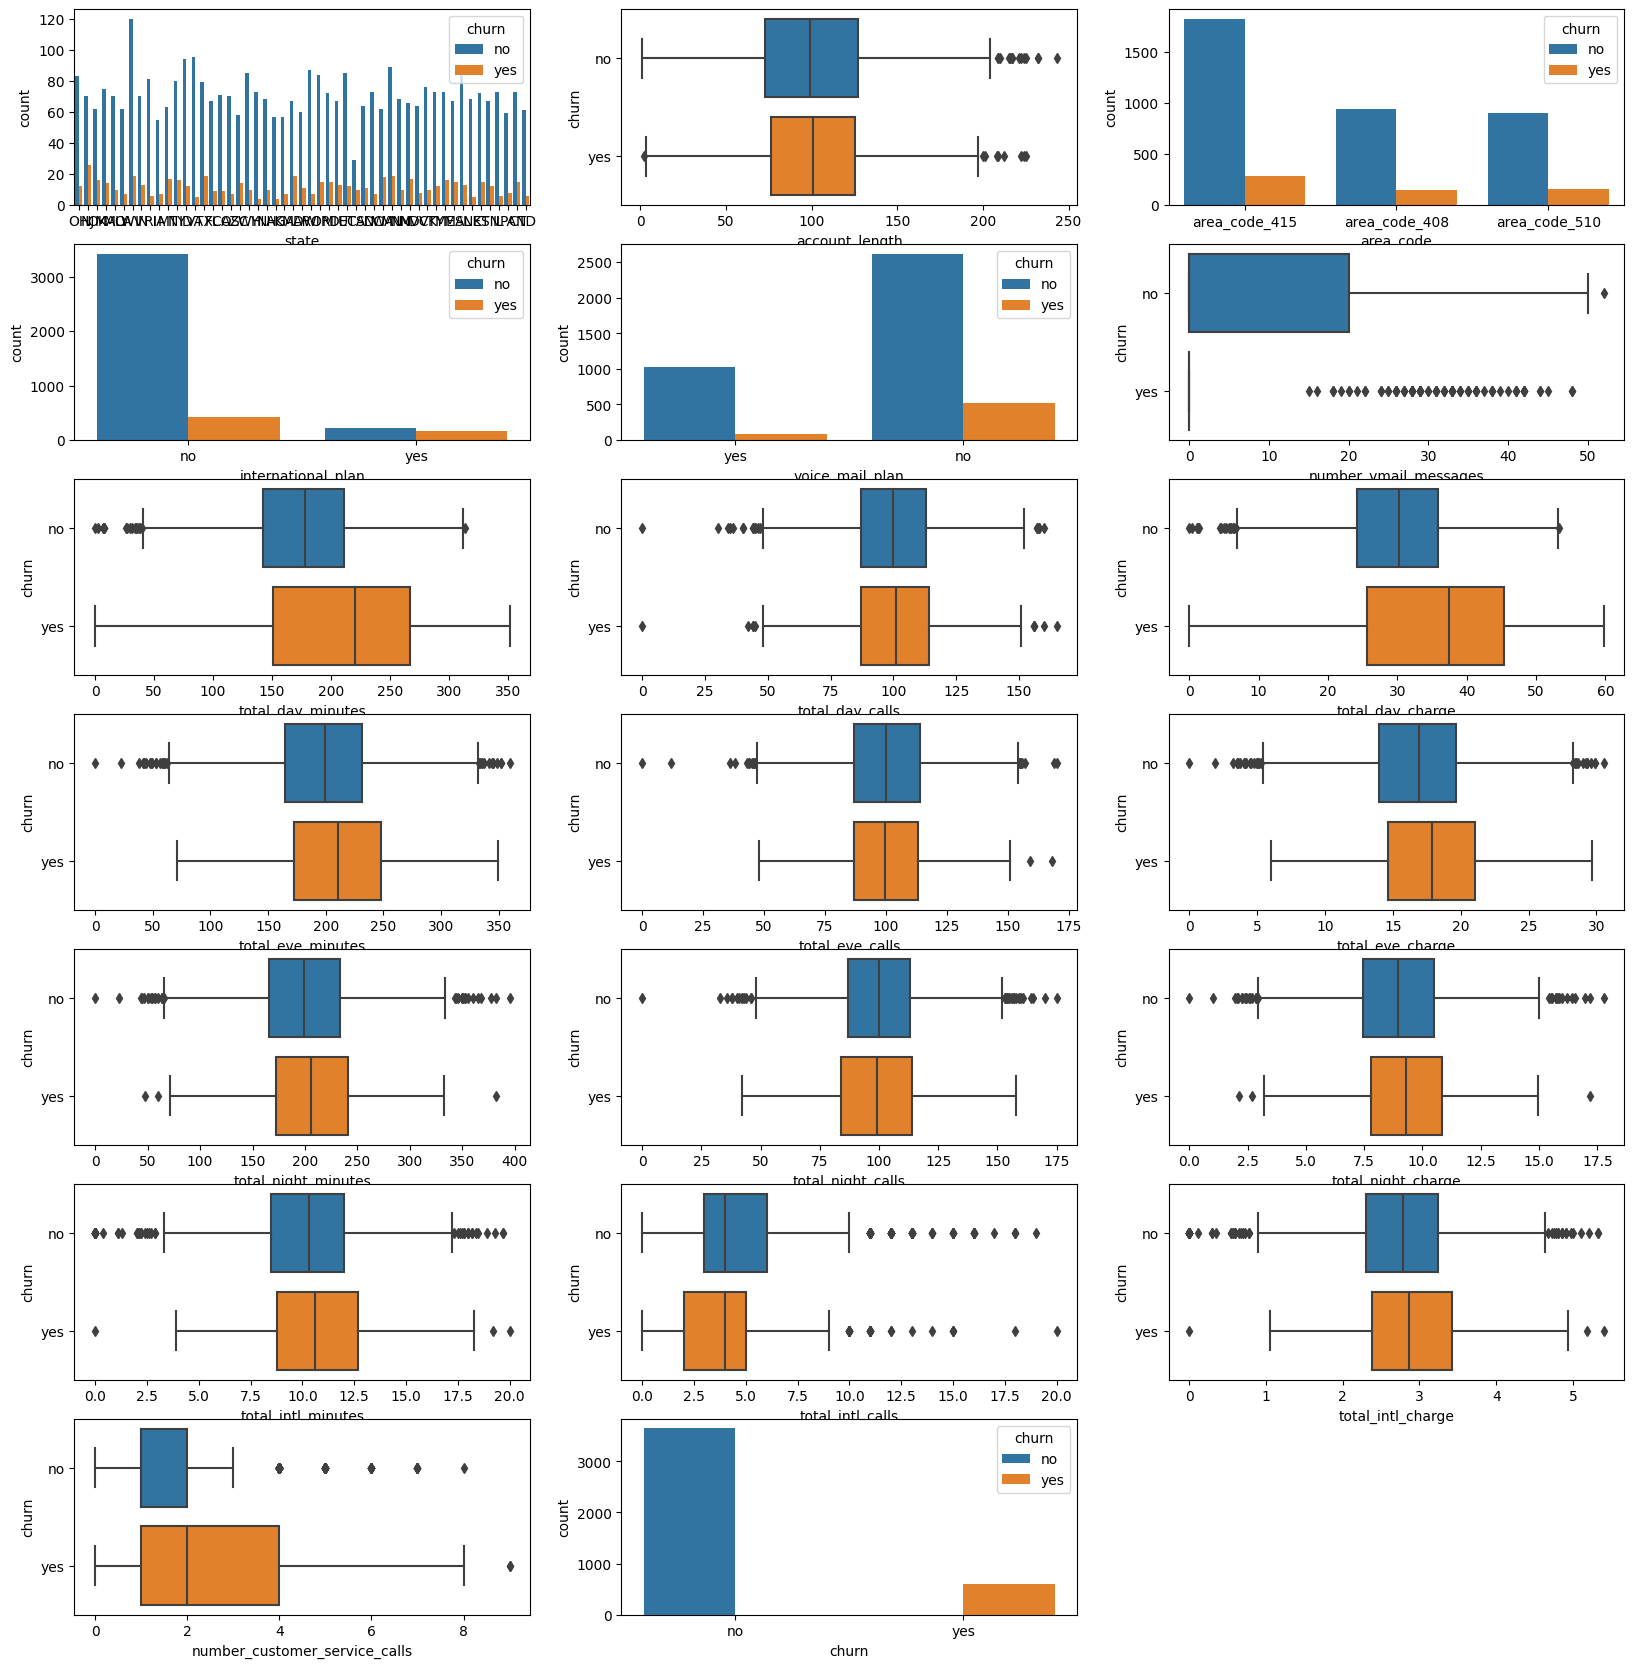

In [ ]:
cols = data_train.columns.tolist()
data_train.churn *= 1

plt.figure(figsize=(20, 30))

for i, variable in enumerate(data_train.columns.tolist()):
    plt.subplot(10, 3, i + 1)
    if data_train.dtypes[variable]=='object':
        sns.countplot(data=data_train, x=variable, hue='churn')
        # plt.savefig('object.png')

    else:
        sns.boxplot(data=data_train, x=variable, y=data_train['churn'].astype('str'))
        # plt.savefig('str.png')

plt.show()
plt.savefig('boxplot.png')

### Conclution Of Quality Investigation

berdasarkan hasil investigasi kualitas data bersih dari data duplikasi dan tidak memiliki missing value. sehingga pada preprocessing tidak dibutuhkan handle duplicate dan missing value. Namun membutuhkan *handling Outliers*

Kode area harus kategoris. selanjutnya melihat semua variabel kategori secara lebih rinci di tahap content investigation.



## Content

### Feature Distribution

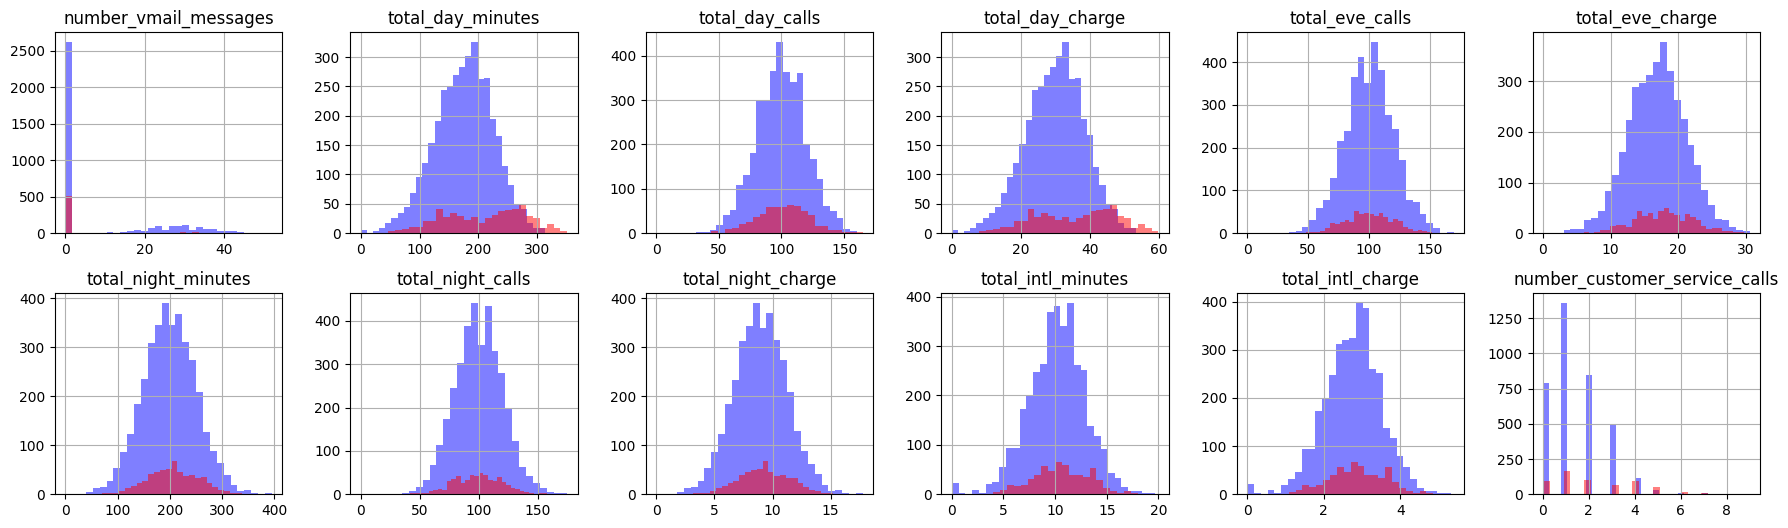

In [ ]:
pred_vars = ['number_vmail_messages', 'total_day_minutes', 'total_day_calls', 'total_day_charge',
             'total_eve_calls', 'total_eve_charge', 'total_night_minutes', 'total_night_calls',
             'total_night_charge', 'total_intl_minutes',
             'total_intl_charge', 'number_customer_service_calls']

fig, ax = plt.subplots(2, 6, figsize=(22, 6));
data_train[data_train.churn == 'no'][pred_vars].hist( bins=30, color="blue", alpha=0.5, ax=ax);
data_train[data_train.churn == 'yes'][pred_vars].hist( bins=30, color="red", alpha=0.5, ax=ax);

Observasi
Total day minutes dan total day charge hari menunjukkan sedikit lebih banyak churn saat nilainya lebih tinggi

Churn juga lebih tinggi saat panggilan layanan Pelanggan 3 atau >=3

Data churn menunjukkan data imbalance, sehingga dibutuhkan proses handling imbalance

### Basic Statistic

In [ ]:
data_train.churn.map(dict(yes=True, no=False)).mean()
data_train['churn'] = data_train['churn'].map(dict(yes=True, no=False))
data_train['churn'].head()


0    False
1    False
2    False
3    False
4    False
Name: churn, dtype: bool

In [ ]:
# data_train.churn.mean()

0.14070588235294118

In [ ]:
data_train.describe().T

,count,mean,std,min,25%,50%,75%,max
account_length,4250.0,100.236235,39.698401,1.0,73.0000,100.00,127.0000,243.00
number_vmail_messages,4250.0,7.631765,13.439882,0.0,0.0000,0.00,16.0000,52.00
total_day_minutes,4250.0,180.259600,54.012373,0.0,143.3250,180.45,216.2000,351.50
total_day_calls,4250.0,99.907294,19.850817,0.0,87.0000,100.00,113.0000,165.00
total_day_charge,4250.0,30.644682,9.182096,0.0,24.3650,30.68,36.7500,59.76
total_eve_minutes,4250.0,200.173906,50.249518,0.0,165.9250,200.70,233.7750,359.30
total_eve_calls,4250.0,100.176471,19.908591,0.0,87.0000,100.00,114.0000,170.00
total_eve_charge,4250.0,17.015012,4.271212,0.0,14.1025,17.06,19.8675,30.54
total_night_minutes,4250.0,200.527882,50.353548,0.0,167.2250,200.45,234.7000,395.00
total_night_calls,4250.0,99.839529,20.093220,0.0,86.0000,100.00,113.0000,175.00


 churn rate dari dataset train adalah sekitar 14%

### Feature Exploration

#### churn rate by area code

In [ ]:
def crosstab_function(df, var):
    tab = pd.DataFrame(pd.crosstab(df[var], df["churn"], margins=True)).reset_index()
    tab['percentage'] = tab[1] / tab['All'] * 100
    tab.columns = [var, 'churn_no', 'churn_yes', 'total', 'churn Percentage']
    return tab

,area_code,churn_no,churn_yes,total,churn Percentage
0,area_code_408,934,152,1086,13.996317
1,area_code_415,1821,287,2108,13.614801
2,area_code_510,897,159,1056,15.056818
3,All,3652,598,4250,14.070588


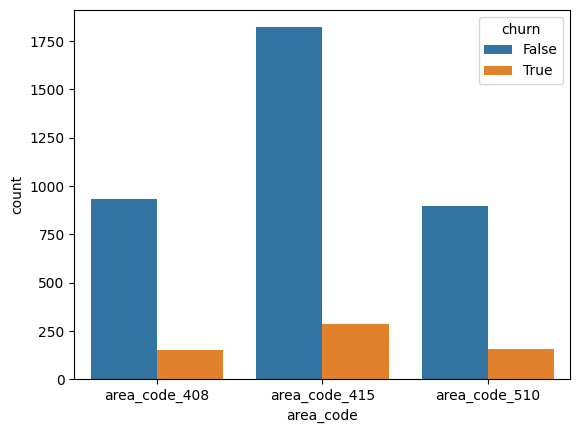

In [ ]:
data_train['area_code'] = data_train['area_code'].astype('category')

sns.countplot(data=data_train, x=data_train['area_code'], hue='churn');
plt.savefig('areacode.png')
crosstab_function(data_train,'area_code')

#### churn rate by international plan

,international_plan,churn_no,churn_yes,total,churn Percentage
0,no,3423,431,3854,11.183186
1,yes,229,167,396,42.171717
2,All,3652,598,4250,14.070588


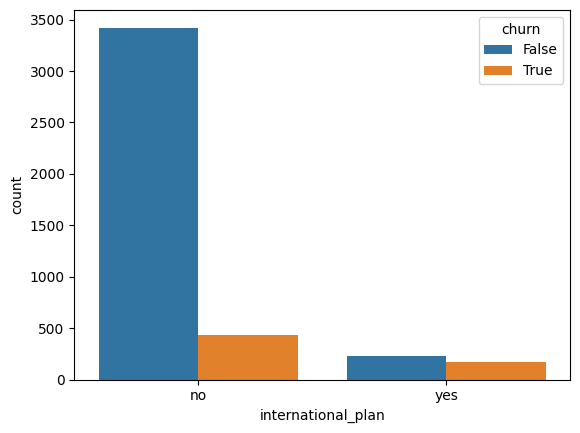

In [ ]:
data_train['international_plan'] = data_train['international_plan'].astype('category')

sns.countplot(data=data_train, x=data_train['international_plan'], hue='churn');
plt.savefig('international.png')
crosstab_function(data_train,'international_plan')

#### churn rate by number customer service calls

,number_customer_service_calls,churn_no,churn_yes,total,churn Percentage
0,0,789,97,886,10.948081
1,1,1358,166,1524,10.892388
2,2,845,102,947,10.770855
3,3,495,63,558,11.290323
4,4,117,92,209,44.019139
5,5,32,49,81,60.493827
6,6,9,19,28,67.857143
7,7,6,7,13,53.846154
8,8,1,1,2,50.000000
9,9,0,2,2,100.000000


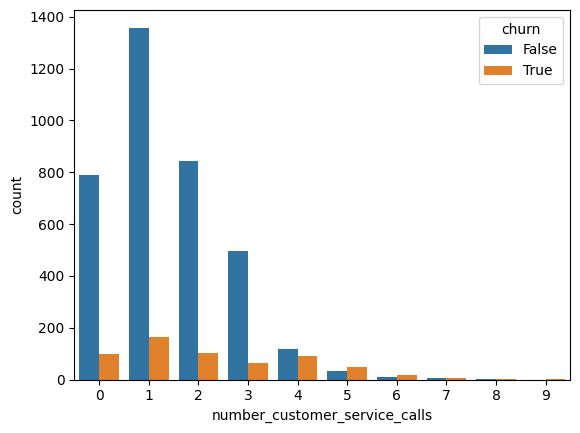

In [ ]:

sns.countplot(data=data_train, x=data_train['number_customer_service_calls'], hue='churn');

crosstab_function(data_train,'number_customer_service_calls')

#### churn rate by voice mail plan

,voice_mail_plan,churn_no,churn_yes,total,churn Percentage
0,no,2622,516,3138,16.443595
1,yes,1030,82,1112,7.374101
2,All,3652,598,4250,14.070588


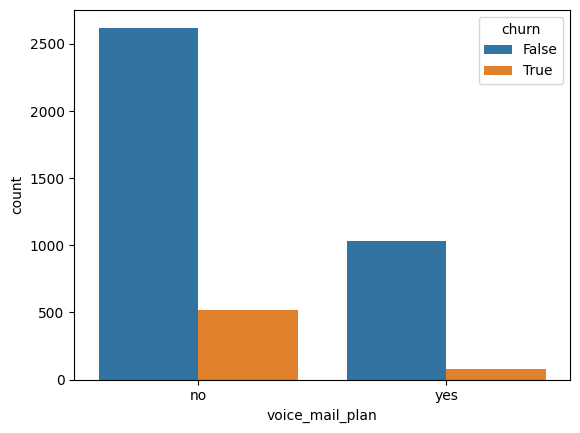

In [ ]:
data_train['voice_mail_plan'] = data_train['voice_mail_plan'].astype('category')

sns.countplot(data=data_train, x=data_train['voice_mail_plan'], hue='churn');
plt.savefig('vmplan.png')
crosstab_function(data_train,'voice_mail_plan')

### Feature Relationship

1. Voice mail plan = NO + International plan = YES
2. Customer service calls >= 3 + Total day minutes >= 35

In [ ]:
data_train[(data_train['voice_mail_plan']=='no') & (data_train['international_plan']=='yes')].churn.value_counts(1)

False    0.544521
True     0.455479
Name: churn, dtype: float64

In [ ]:
data_train[(data_train['number_customer_service_calls']>=4) & (data_train['total_day_minutes']>=35)].churn.value_counts(1)

True     0.505988
False    0.494012
Name: churn, dtype: float64

### Feature Correlations

In [ ]:
data_train.corr()

,account_length,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,churn
account_length,1.000000,-0.006626,-0.001612,0.023002,-0.001613,-0.010326,0.005535,-0.010322,-0.009916,-0.001846,-0.009942,0.004539,0.013690,0.004494,0.001002,0.019378
number_vmail_messages,-0.006626,1.000000,0.002000,-0.006920,0.001994,0.010725,0.003593,0.010736,0.018308,0.001977,0.018300,0.005220,0.006585,0.005249,-0.015303,-0.100347
total_day_minutes,-0.001612,0.002000,1.000000,0.000747,1.000000,-0.013248,0.005986,-0.013258,0.010049,-0.004812,0.010036,-0.021369,0.003859,-0.021291,-0.002925,0.215272
total_day_calls,0.023002,-0.006920,0.000747,1.000000,0.000751,0.008661,0.003739,0.008663,0.002206,-0.004815,0.002200,0.008834,0.009377,0.008909,-0.015845,0.011640
total_day_charge,-0.001613,0.001994,1.000000,0.000751,1.000000,-0.013247,0.005985,-0.013257,0.010053,-0.004816,0.010040,-0.021374,0.003853,-0.021296,-0.002932,0.215263
total_eve_minutes,-0.010326,0.010725,-0.013248,0.008661,-0.013247,1.000000,0.003101,1.000000,-0.014018,0.011973,-0.014031,-0.003509,0.012239,-0.003460,-0.010063,0.078855
total_eve_calls,0.005535,0.003593,0.005986,0.003739,0.005985,0.003101,1.000000,0.003120,0.008425,-0.011929,0.008441,-0.013096,0.004949,-0.013145,0.006956,-0.006817
total_eve_charge,-0.010322,0.010736,-0.013258,0.008663,-0.013257,1.000000,0.003120,1.000000,-0.014022,0.011971,-0.014035,-0.003512,0.012239,-0.003463,-0.010071,0.078852
total_night_minutes,-0.009916,0.018308,0.010049,0.002206,0.010053,-0.014018,0.008425,-0.014022,1.000000,0.023815,0.999999,-0.000113,-0.024280,-0.000047,-0.013771,0.046647
total_night_calls,-0.001846,0.001977,-0.004812,-0.004815,-0.004816,0.011973,-0.011929,0.011971,0.023815,1.000000,0.023798,0.001093,0.003851,0.001054,-0.008893,-0.012699


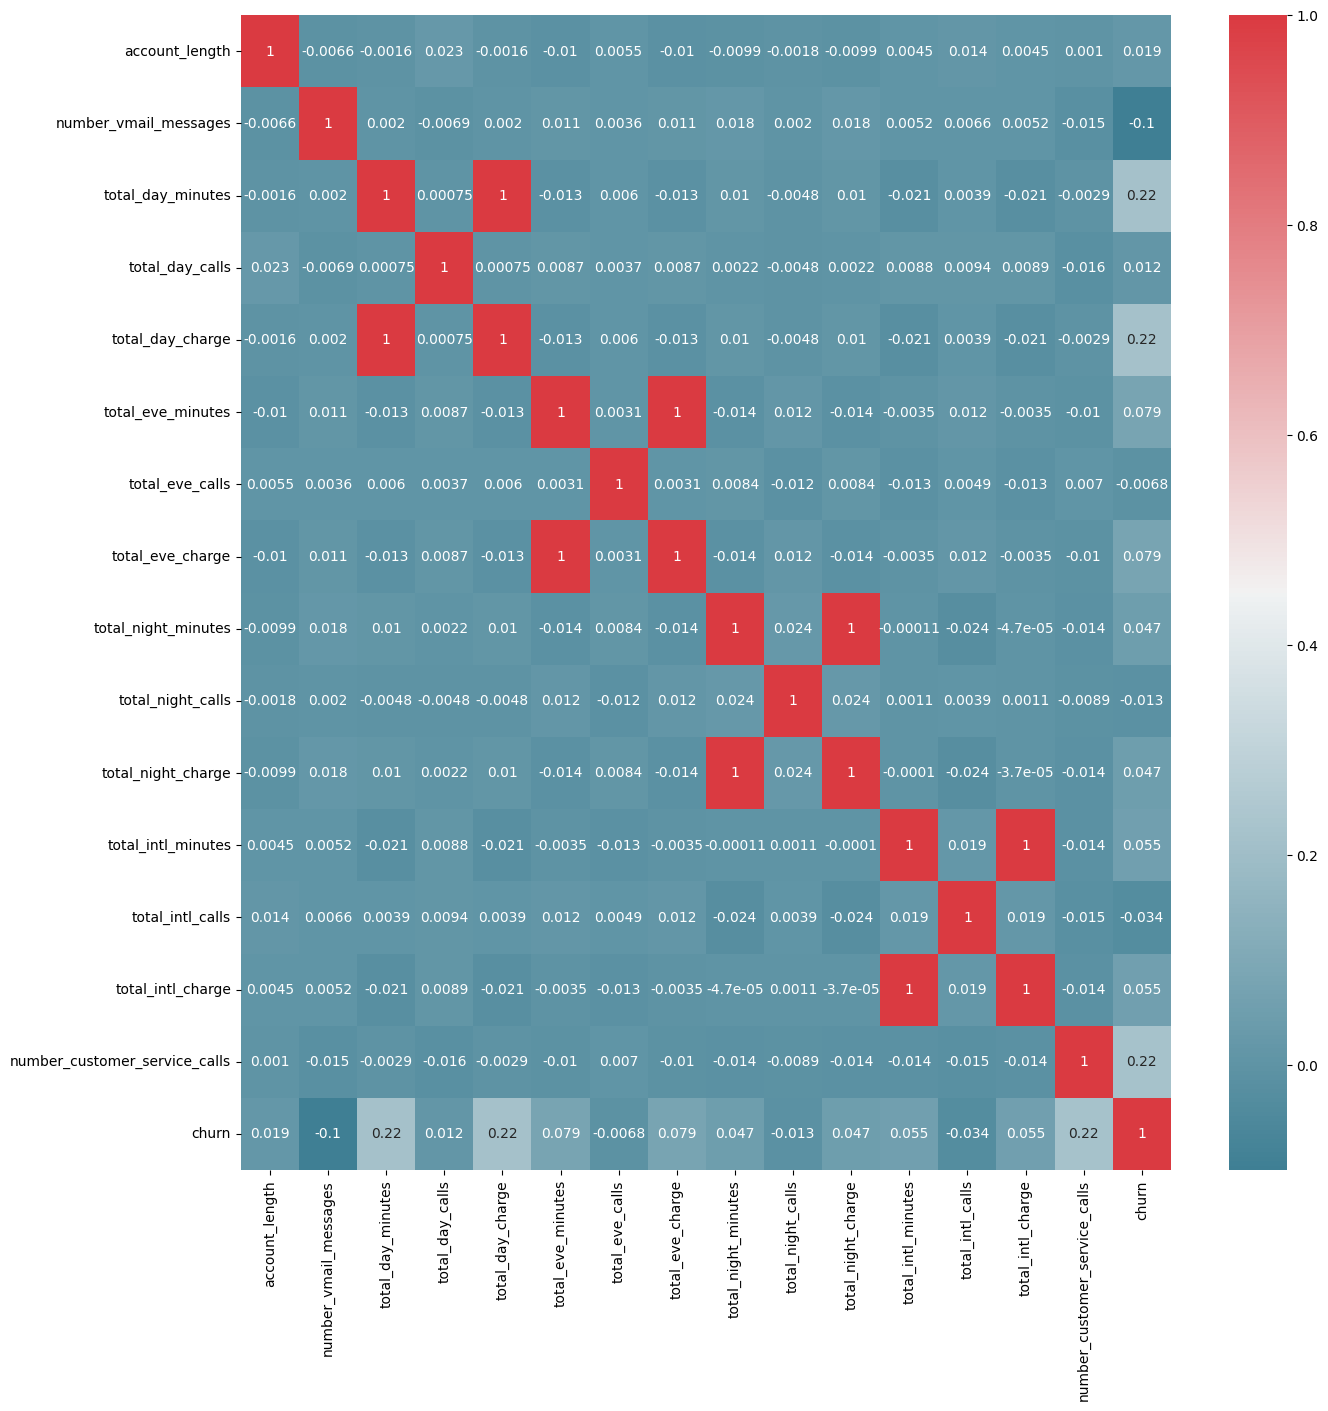

In [ ]:
plt.figure(figsize=(15,15))

cmap = sns.diverging_palette(221, 11, as_cmap=True)
sns.heatmap( data_train.corr(),annot=True, cmap=cmap);
plt.savefig('heatmap.png')

total_night_charge dan total_night_minutes

total_day_charge dan total_day_minutes

total_intl_charge dan total_intl_minutes

Hal ini telah diduga karena jika orang tersebut menggunakan lebih banyak menit, mereka perlu menagih lebih banyak.

# PREPROCESSING

In [ ]:
data_train.head().T

,0,1,2,3,4
state,OH,NJ,OH,OK,MA
account_length,107,137,84,75,121
area_code,area_code_415,area_code_415,area_code_408,area_code_415,area_code_510
international_plan,no,no,yes,yes,no
voice_mail_plan,yes,no,no,no,yes
number_vmail_messages,26,0,0,0,24
total_day_minutes,161.6,243.4,299.4,166.7,218.2
total_day_calls,123,114,71,113,88
total_day_charge,27.47,41.38,50.9,28.34,37.09
total_eve_minutes,195.5,121.2,61.9,148.3,348.5


## Handle Outliers

In [ ]:
cat_feature = [ 'state','international_plan', 'voice_mail_plan', 'number_customer_service_calls','area_code', 'number_vmail_messages']
num_feature = list(set(data_train.columns) - set(cat_feature)-{'churn'})

In [ ]:
num_feature

['total_night_calls',
 'total_intl_minutes',
 'total_intl_charge',
 'total_day_minutes',
 'total_intl_calls',
 'total_night_minutes',
 'total_eve_calls',
 'total_day_charge',
 'total_eve_charge',
 'total_day_calls',
 'total_eve_minutes',
 'account_length',
 'total_night_charge']

In [ ]:
print(f'Jumlah baris sebelum memfilter outlier: {len(data_train)}')
filtered_entries = np.array([True] * len(data_train))
for col in num_feature:
    Q1 = data_train[col].quantile(0.25)
    Q3 = data_train[col].quantile(0.75)
    IQR = Q3 - Q1
    low_limit = Q1 - (IQR * 1.5)
    high_limit = Q3 + (IQR * 1.5)

    filtered_entries = ((data_train[col] >= low_limit) & (data_train[col] <= high_limit)) & filtered_entries

data_train = data_train[filtered_entries]

print(f'Jumlah baris setelah memfilter outlier: {len(data_train)}')

Jumlah baris sebelum memfilter outlier: 4250
Jumlah baris setelah memfilter outlier: 3899


## Convert To Numeric

In [ ]:
le = LabelEncoder()

data_train['international_plan'] = le.fit_transform(data_train['international_plan'])
data_train['voice_mail_plan'] = le.fit_transform(data_train['voice_mail_plan'])
data_train['churn'] = le.fit_transform(data_train['churn'])

In [ ]:
data_train.head().T

,0,1,3,5,7
state,OH,NJ,OK,MO,WV
account_length,107,137,75,147,141
area_code,area_code_415,area_code_415,area_code_415,area_code_415,area_code_415
international_plan,0,0,1,1,1
voice_mail_plan,1,0,0,0,1
number_vmail_messages,26,0,0,0,37
total_day_minutes,161.6,243.4,166.7,157.0,258.6
total_day_calls,123,114,113,79,84
total_day_charge,27.47,41.38,28.34,26.69,43.96
total_eve_minutes,195.5,121.2,148.3,103.1,222.0


## Convert Categorical

### number customer service calls category

In [ ]:
df_final=data_train

In [ ]:
df_final_test = data_test

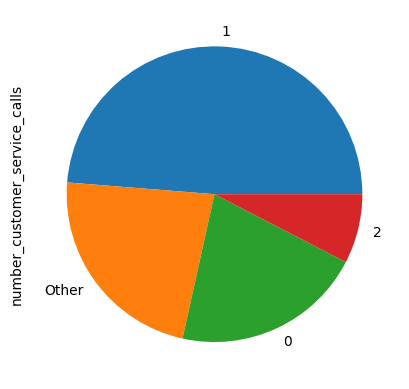

In [ ]:
def groupcat(x):
    if x == 0:
        return '0'
    elif x >= 1 | x <= 3:
        return '1'
    elif x >= 4 | x <= 6:
        return '2'
    else:
        return 'Other'

df_final['number_customer_service_calls'] = df_final['number_customer_service_calls'].apply(groupcat)
df_final_test['number_customer_service_calls'] = df_final_test['number_customer_service_calls'].apply(groupcat)
df_final['number_customer_service_calls'].value_counts().plot(kind = 'pie');

### number vmail messages category

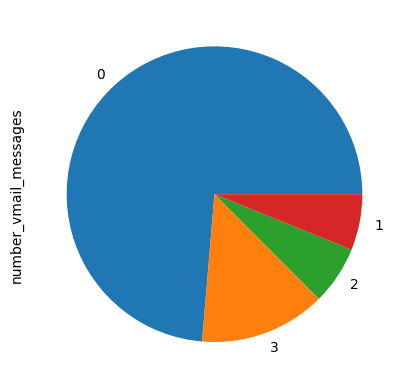

In [ ]:
def categorizing(x):
    if x == 0:
        return 0
    elif x < 24:
        return 1
    elif x < 29:
        return 2
    else:
        return 3

df_final['number_vmail_messages'] = df_final['number_vmail_messages'].apply(categorizing)
df_final_test['number_vmail_messages'] = df_final_test['number_vmail_messages'].apply(categorizing)
df_final['number_vmail_messages'].value_counts().plot(kind = 'pie');

In [ ]:
feature_cat = ['number_vmail_messages', 'number_customer_service_calls', 'area_code']

In [ ]:
df_final = pd.get_dummies(df_final, columns=feature_cat, drop_first=True)
df_final_test = pd.get_dummies(df_final_test, columns=feature_cat, drop_first=True)

In [ ]:
df_final.head()

,state,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,...,total_intl_charge,churn,number_vmail_messages_1,number_vmail_messages_2,number_vmail_messages_3,number_customer_service_calls_1,number_customer_service_calls_2,number_customer_service_calls_Other,area_code_area_code_415,area_code_area_code_510
0,OH,107,0,1,161.6,123,27.47,195.5,103,16.62,...,3.70,0,0,1,0,1,0,0,1,0
1,NJ,137,0,0,243.4,114,41.38,121.2,110,10.30,...,3.29,0,0,0,0,0,0,0,1,0
3,OK,75,1,0,166.7,113,28.34,148.3,122,12.61,...,2.73,0,0,0,0,1,0,0,1,0
5,MO,147,1,0,157.0,79,26.69,103.1,94,8.76,...,1.92,0,0,0,0,0,0,0,1,0
7,WV,141,1,1,258.6,84,43.96,222.0,111,18.87,...,3.02,0,0,0,1,0,0,0,1,0


In [ ]:
df_final.shape

(3899, 25)

## Handle Imbalance

In [ ]:
df_final.drop([ 'state'], axis = 1, inplace = True)

In [ ]:
X = df_final.drop('churn', axis = 1)
y = df_final['churn']

print(X.shape)
print(y.shape)

(3899, 23)
(3899,)


In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE()
raw_X, raw_y = sm.fit_resample(X, y)


In [ ]:
data = pd.concat([raw_X, raw_y], axis = 1)


In [ ]:
data.shape

(6734, 24)

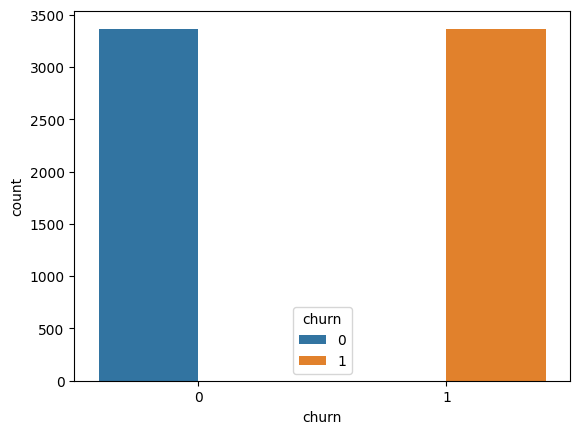

In [ ]:
sns.countplot(data=data, x=data['churn'], hue='churn');

## Feature Encoding

In [ ]:
scaler = StandardScaler()
df_final_balance = data
df_final_balance[num_feature] = scaler.fit_transform(df_final_balance[num_feature])

In [ ]:
df_final_balance.shape

(6734, 24)

In [ ]:
X = df_final_balance.drop('churn', axis = 1)
y = df_final_balance['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [ ]:
X_train

,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,total_intl_calls,total_intl_charge,number_vmail_messages_1,number_vmail_messages_2,number_vmail_messages_3,number_customer_service_calls_1,number_customer_service_calls_2,number_customer_service_calls_Other,area_code_area_code_415,area_code_area_code_510
6391,1.022499,0,0,1.086425,-0.316955,1.086428,-0.292540,1.716494,-0.291505,0.962176,...,-0.995999,0.385450,0,0,0,1,0,0,0,1
2726,0.107696,0,0,1.184303,-1.040265,1.183860,0.116032,1.662220,0.115127,1.657299,...,-1.510226,0.376900,0,0,0,0,0,1,1,0
395,-0.618765,0,0,-0.469247,0.684551,-0.469286,0.323569,-0.563030,0.322664,0.643859,...,-0.481773,-1.538027,0,0,0,0,0,1,1,0
1777,0.376755,0,0,-0.598904,-1.374100,-0.599042,-0.697511,-0.671579,-0.697928,0.082961,...,0.546681,0.917403,0,0,0,0,0,1,1,0
2548,-0.591859,0,0,-1.370111,0.295076,-1.369652,1.714063,-0.508756,1.714381,0.945554,...,2.603588,-2.294732,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1563,-1.156885,0,1,0.173987,-1.318461,0.173549,1.589541,1.228025,1.589859,-1.038834,...,-1.510226,0.593101,0,0,1,1,0,0,1,0
6196,0.296038,0,0,-0.642042,-1.151544,-0.641807,-0.962545,-1.865616,-0.962318,1.281264,...,-1.510226,-0.685041,0,0,0,0,0,0,0,0
1487,0.511285,0,0,1.165780,0.072519,1.166031,1.099755,-1.702793,1.099096,0.552501,...,-0.995999,-0.163604,0,0,0,1,0,0,0,0
5702,0.672721,0,0,0.831246,-0.873347,0.831300,1.486714,-0.617305,1.486283,-0.375563,...,-0.995999,0.135196,0,0,0,0,0,0,1,0


#MODELLING

In [ ]:
models = []
models.append(('Logistic Regression', LogisticRegression(solver='liblinear',
                                                         class_weight='balanced')))
models.append(('KNN', KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)))
models.append(('Decision Tree Classifier',
               DecisionTreeClassifier(criterion = 'entropy', random_state = 0)))
models.append(('Random Forest', RandomForestClassifier(
    n_estimators=100, criterion = 'entropy')))


In [ ]:
#Evaluating Model Results:
acc_results = []
auc_results = []
names = []
# set table to table to populate with performance results
col = ['Algorithm', 'ROC AUC Mean', 'ROC AUC STD',
       'Accuracy Mean', 'Accuracy STD']
model_results = pd.DataFrame(columns=col)
i = 0
# Evaluate each model using k-fold cross-validation:
for name, model in models:
    kfold = model_selection.KFold(
        n_splits=10, random_state=None)

    # accuracy scoring:
    cv_acc_results = model_selection.cross_val_score(
    model, X_train, y_train, cv=kfold, scoring='accuracy')

    # roc_auc scoring:
    cv_auc_results = model_selection.cross_val_score(
    model, X_train, y_train, cv=kfold, scoring='roc_auc')
    acc_results.append(cv_acc_results)
    auc_results.append(cv_auc_results)
    names.append(name)
    model_results.loc[i] = [name,
                            round(cv_auc_results.mean()*100, 2),
                            round(cv_auc_results.std()*100, 2),
                            round(cv_acc_results.mean()*100, 2),
                            round(cv_acc_results.std()*100, 2)
                            ]
    i += 1

model_results.sort_values(by=['ROC AUC Mean'], ascending=False)

,Algorithm,ROC AUC Mean,ROC AUC STD,Accuracy Mean,Accuracy STD
3,Random Forest,97.67,0.49,92.11,0.87
1,KNN,94.80,0.72,84.28,1.28
0,Logistic Regression,89.31,1.22,81.79,1.87
2,Decision Tree Classifier,86.92,1.07,86.97,1.06


In [ ]:
# Model with 81 decision trees
rf = RandomForestClassifier (n_estimators = 81, random_state = 42)
# Training model
rf.fit (X_train, y_train);

In [ ]:
y_rf = rf.predict(X_test)
print (pd.crosstab(y_test,y_rf, rownames=['Real'], colnames=['Predicted'], margins=True))

Predicted    0    1   All
Real                     
0          624   60   684
1           42  621   663
All        666  681  1347


In [ ]:
print(classification_report(y_test, y_rf))

              precision    recall  f1-score   support

           0       0.94      0.91      0.92       684
           1       0.91      0.94      0.92       663

    accuracy                           0.92      1347
   macro avg       0.92      0.92      0.92      1347
weighted avg       0.92      0.92      0.92      1347



In [ ]:
# Feature Importance
rf.feature_importances_
feature_importances = pd.DataFrame(rf.feature_importances_, index = X_train.columns, columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
total_day_charge,0.112514
total_day_minutes,0.111636
number_customer_service_calls_1,0.095001
number_customer_service_calls_Other,0.060652
total_eve_minutes,0.054565
total_eve_charge,0.051927
voice_mail_plan,0.047534
total_night_minutes,0.039938
total_night_charge,0.039591
total_intl_charge,0.038223


# PREDICTING

In [ ]:
df_final_test.head()
df_state = df_final_test[['id','state']]
df_final_test.drop([ 'id','state'], axis = 1, inplace = True)

In [ ]:
df_final_test['international_plan'] = le.fit_transform(df_final_test['international_plan'])
df_final_test['voice_mail_plan'] = le.fit_transform(df_final_test['voice_mail_plan'])

In [ ]:
df_final_test.head()

,account_length,international_plan,voice_mail_plan,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,total_intl_calls,total_intl_charge,number_vmail_messages_1,number_vmail_messages_2,number_vmail_messages_3,number_customer_service_calls_1,number_customer_service_calls_2,number_customer_service_calls_Other,area_code_area_code_415,area_code_area_code_510
0,128,0,1,265.1,110,45.07,197.4,99,16.78,244.7,...,3,2.70,0,1,0,1,0,0,1,0
1,118,1,0,223.4,98,37.98,220.6,101,18.75,203.9,...,6,1.70,0,0,0,0,0,0,0,1
2,62,0,0,120.7,70,20.52,307.2,76,26.11,203.0,...,6,3.54,0,0,0,0,1,0,1,0
3,93,0,0,190.7,114,32.42,218.2,111,18.55,129.6,...,3,2.19,0,0,0,1,0,0,0,1
4,174,0,0,124.3,76,21.13,277.1,112,23.55,250.7,...,5,4.19,0,0,0,1,0,0,1,0


In [ ]:
predicted = rf.predict(df_final_test)

In [ ]:
data_test.head()

,id,state,account_length,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls
0,1,KS,128,area_code_415,no,yes,2,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,2,AL,118,area_code_510,yes,no,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0
2,3,IA,62,area_code_415,no,no,0,120.7,70,20.52,307.2,76,26.11,203.0,99,9.14,13.1,6,3.54,2
3,4,VT,93,area_code_510,no,no,0,190.7,114,32.42,218.2,111,18.55,129.6,121,5.83,8.1,3,2.19,1
4,5,NE,174,area_code_415,no,no,0,124.3,76,21.13,277.1,112,23.55,250.7,115,11.28,15.5,5,4.19,1


In [ ]:
submission = pd.DataFrame({
        "id": data_test["id"],
        "churn_result": predicted
    })
submission.head()

,id,churn_result
0,1,0
1,2,1
2,3,1
3,4,1
4,5,1


In [ ]:
submission['churn'] = submission['churn_result'].map({ 0: 'no', 1: 'yes' })
submission.head()

,id,churn_result,churn
0,1,0,no
1,2,1,yes
2,3,1,yes
3,4,1,yes
4,5,1,yes


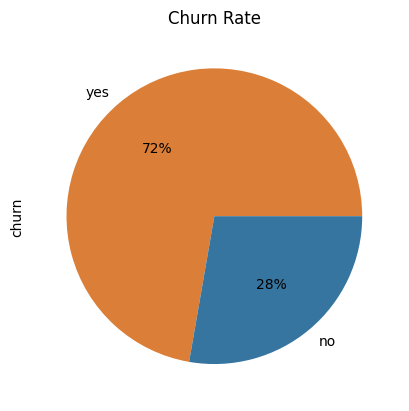

In [ ]:
submission['churn'].value_counts().plot(title = 'Churn Rate', kind = 'pie', autopct='%1.0f%%', colors=['#DB7E37','#36759F']);
plt.savefig('churn_persen.png')

In [ ]:
data_test['churn'] = submission['churn']
data_test.head().T

,0,1,2,3,4
id,1,2,3,4,5
state,KS,AL,IA,VT,NE
account_length,128,118,62,93,174
area_code,area_code_415,area_code_510,area_code_415,area_code_510,area_code_415
international_plan,no,yes,no,no,no
voice_mail_plan,yes,no,no,no,no
number_vmail_messages,2,0,0,0,0
total_day_minutes,265.1,223.4,120.7,190.7,124.3
total_day_calls,110,98,70,114,76
total_day_charge,45.07,37.98,20.52,32.42,21.13


In [ ]:
# data_test.churn.map(dict(yes=True, no=False)).mean()
data_test['churn'] = data_test['churn'].map(dict(yes=True, no=False))
data_test['churn'].head()

0    False
1     True
2     True
3     True
4     True
Name: churn, dtype: bool

In [ ]:
def crosstab_function(df, var):
    tab = pd.DataFrame(pd.crosstab(df[var], df["churn"], margins=True)).reset_index()
    tab['percentage'] = tab[1] / tab['All'] * 100
    tab.columns = [var, 'churn_no', 'churn_yes', 'total', 'churn Percentage']
    return tab

In [ ]:
data_test.churn.mean()

0.7226666666666667

,area_code,churn_no,churn_yes,total,churn Percentage
0,area_code_408,44,129,173,74.566474
1,area_code_415,108,279,387,72.093023
2,area_code_510,56,134,190,70.526316
3,All,208,542,750,72.266667


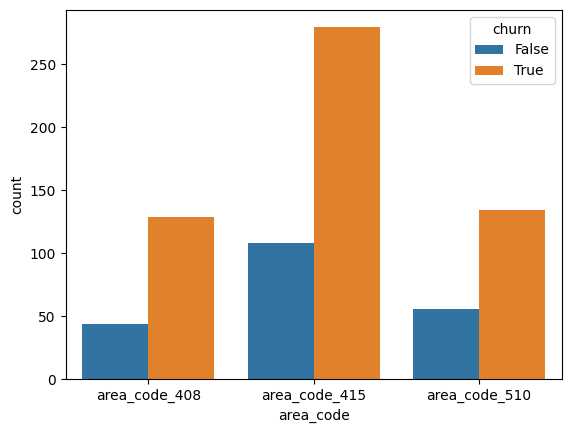

In [ ]:
data_test['area_code'] = data_test['area_code'].astype('category')
sns.countplot(data=data_test, x=data_test['area_code'], hue='churn');
crosstab_function(data_test,'area_code')